<a href="https://colab.research.google.com/github/AlyssaAmod/UNN_BraTS23/blob/main/Augmentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install synapseclient

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: keyring
    Found existing installation: keyring 23.5.0
    Uninstalling keyring-23.5.0:
      Successfully uninstalled keyring-23.5.0


In [ ]:
import synapseclient
syn = synapseclient.Synapse()
syn.login(email='pearlyjoubert2@gmail.com', password='SPARK_BRATS_2023')
SSA = syn.get("syn51692615")
GLI = syn.get("syn51514132")
# creating file path
SSA_path = SSA.path
GLI_path = GLI.path


specific_string = "BraTS-"

[WARNING] Logging into Synapse via passwords will be deprecated by early 2024. This message will disappear if you use a Synapse Personal Access Token to login.


Welcome, pearlyjoubert2@gmail.com!



INFO:synapseclient_default:Welcome, pearlyjoubert2@gmail.com!



In [ ]:
import zipfile
import os

path_to_SSA = SSA_path
path_to_GLI = GLI_path
SSA_dir = "/content/sample_data/SSA_data"
if not os.path.exists(SSA_dir):
    os.mkdir(SSA_dir)
GLI_dir = "/content/sample_data/GLI_data"
if not os.path.exists(GLI_dir):
    os.mkdir(GLI_dir)

with zipfile.ZipFile(path_to_SSA, 'r') as zip_ref:
    zip_ref.extractall(SSA_dir)

with zipfile.ZipFile(path_to_GLI, 'r') as zip_ref:
    zip_ref.extractall(GLI_dir)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.8/172.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 10.0 MB/s eta 0:00:00
ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData
['BraTS-GLI-00525-001', 'BraTS-GLI-01360-000', 'BraTS-GLI-01071-000', 'BraTS-GLI-01394-000', 'BraTS-GLI-01666-000', 'BraTS-GLI-00094-000', 'BraTS-GLI-00716-000', 'BraTS-GLI-01202-000', 'BraTS-GLI-00656-000', 'BraTS-GLI-00399-000', 'BraTS-GLI-00156-000', 'BraTS-GLI-00767-000', 'BraTS-GLI-00199-000', 'BraTS-GLI-00432-000', 'BraTS-GLI-00517-000', 'BraTS-GLI-01259-000', 'BraTS-GLI-01399-000', 'BraTS-GLI-00682-001', 'BraTS-GLI-00556-000', 'BraTS-GLI-00533-000', 'BraTS-GLI-00729-000', 'BraTS-GLI-01257-000', 'BraTS-GLI-01391-000', 'BraTS-GLI-01113-000', 'BraTS-GLI-01479-000', 'BraTS-GLI-01205-000', 'BraTS-GLI-00297-000', 'BraTS-GLI-00376-000', 'BraTS-GLI-01215-000', 'BraTS-GLI-00502-001', 'BraTS-GLI-01066-000', 'BraTS-GLI-00233-000', 'BraTS-GLI-00587-000', 'BraTS-GLI-00005-000', 'BraTS

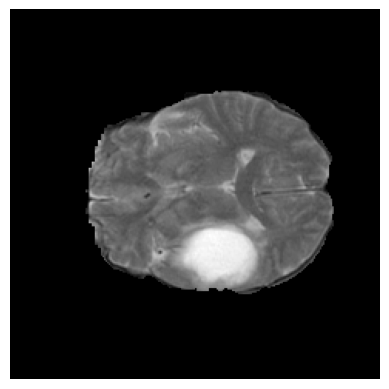

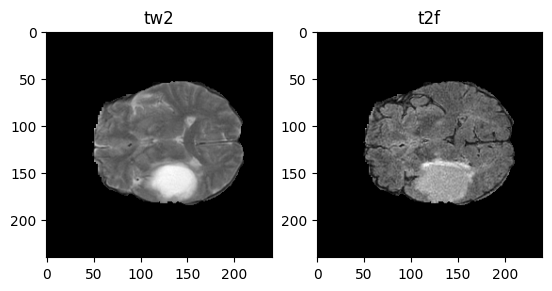

In [ ]:
import random
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
!pip install torchio
import torchio as tio
from torchio.transforms import RandomFlip

def print_files(x):
    # Get a list of all the folders in the specified directory path
    folders = [folder for folder in os.listdir(x) if os.path.isdir(os.path.join(x, folder))]

    # Randomly select a folder from the list
    selected_folder = random.choice(folders)

    print(selected_folder)
    # Get the complete path of the selected folder
    selected_folder_path = os.path.join(x, selected_folder)

    # Get a list of all the files inside the selected folder
    files = os.listdir(selected_folder_path)
    print(files)
    #random_number = random.randint(0, 61)
    #use_file = random.choice(files)
    use_file = "BraTS-GLI-01442-000"
    selected_subfolder_path = os.path.join(x, selected_folder, use_file)
    print(selected_subfolder_path)
    #mod_files = os.listdir(selected_subfolder_path)
    #print(mod_files)

    dir_list = os.listdir(selected_subfolder_path)
    SSA_data = "/content/sample_data/GLI_data"
    if not os.path.exists(SSA_data):
      os.mkdir(SSA_data)
    # Print the files in the folder


    labels_SSA = []
    SSA_loop = []
    for item in dir_list:

        print(item)
        item_path = os.path.join(selected_subfolder_path, item)
        print(item_path)
        if os.path.isfile(item_path):
          # display the image
          # apply augmentation - RandomFlip
          GLI_image = tio.ScalarImage(item_path) #converts to 4D tensor
          #subject = tio.Subject(image=GLI_image)
          #transform = RandomFlip(axes=(0, 1, 2), p=0.3)
          #transformed_subject = transform(subject)
          #transformed_image = transformed_subject['image']


          transform = tio.RandomFlip(axes=(0, 1, 2), p=0.3)
          transformed_image = transform(GLI_image)

          #img = nib.load(item_path)

          transformed_new = np.squeeze(transformed_image)
          #data = np.array(img.dataobj)
          data = np.array(transformed_new)
          print("this is the data", data.shape)

          base_name = os.path.basename(item_path)
          base_name_without_extension = base_name[:-7]
          parts = base_name_without_extension.split("-")
          other = base_name_without_extension.split("-")
          mod_type = parts[-1]
          Patient = other[-3]
          print(Patient)

          #nifti_data = nifti_file.get_fdata()
          image = data[ :, :, 75]
          plt.imshow(image, cmap='gray')
          plt.axis('off')
          plt.savefig(os.path.join(SSA_data + "-" + Patient + "-" +  mod_type + '.png'))
          #plt.show()

          SSA_loop.append(image)
          #print("this is the SSA loop ", SSA_loop)
          #if mod_type == "t2w":

          labels_SSA.append(mod_type)
          print(labels_SSA)
          subplot_path = "/content/sample_data/RandomFlip_GLI/"
          if not os.path.exists(subplot_path):
            os.mkdir(subplot_path)
          #label_mod = ["t2w", "t2f"]
          if len(labels_SSA) > 4:
            mod_t2w = labels_SSA.index("t2w")
            mod_t2f = labels_SSA.index("t2f")
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(SSA_loop[mod_t2w], cmap = "gray")
            ax[1].imshow(SSA_loop[mod_t2f], cmap = "gray")
            ax[0].set_title("tw2")
            ax[1].set_title("t2f")
            plt.savefig(os.path.join(subplot_path + "GLI" + "-" +  Patient +  '.png'), bbox_inches='tight')
            plt.show()




        #fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))

        #labels = ["(a)", "(b)", "(c)", "(d)", "(e)"]
        #for i, img in enumerate(SSA_loop):
         #ax[i].imshow(img, cmap='gray')
         #ax[i].axis('off')
         #ax[i].set_title(labels_SSA[i], y=-0.09)



print_files(GLI_dir)





In [ ]:

import torchio as tio
import numpy as np

# Load the image
image = tio.ScalarImage('/content/sample_data/GLI_data/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/BraTS-GLI-00000-000/BraTS-GLI-00000-000-t2w.nii.gz')

# Apply RandomFlip transformation
transform = tio.RandomFlip(axes=(0, 1))
transformed_image = transform(image)
new = np.squeeze(transformed_image)
print(new.shape)

# Print the transformed image
#print(transformed_image.shape)
#convert = np.array(transformed_image)
#print(convert)




(240, 240, 155)


ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData
['BraTS-GLI-00525-001', 'BraTS-GLI-01360-000', 'BraTS-GLI-01071-000', 'BraTS-GLI-01394-000', 'BraTS-GLI-01666-000', 'BraTS-GLI-00094-000', 'BraTS-GLI-00716-000', 'BraTS-GLI-01202-000', 'BraTS-GLI-00656-000', 'BraTS-GLI-00399-000', 'BraTS-GLI-00156-000', 'BraTS-GLI-00767-000', 'BraTS-GLI-00199-000', 'BraTS-GLI-00432-000', 'BraTS-GLI-00517-000', 'BraTS-GLI-01259-000', 'BraTS-GLI-01399-000', 'BraTS-GLI-00682-001', 'BraTS-GLI-00556-000', 'BraTS-GLI-00533-000', 'BraTS-GLI-00729-000', 'BraTS-GLI-01257-000', 'BraTS-GLI-01391-000', 'BraTS-GLI-01113-000', 'BraTS-GLI-01479-000', 'BraTS-GLI-01205-000', 'BraTS-GLI-00297-000', 'BraTS-GLI-00376-000', 'BraTS-GLI-01215-000', 'BraTS-GLI-00502-001', 'BraTS-GLI-01066-000', 'BraTS-GLI-00233-000', 'BraTS-GLI-00587-000', 'BraTS-GLI-00005-000', 'BraTS-GLI-01237-000', 'BraTS-GLI-01058-000', 'BraTS-GLI-00101-000', 'BraTS-GLI-00412-000', 'BraTS-GLI-00638-000', 'BraTS-GLI-00802-000', 'BraTS-GLI-00186-000', 'BraTS-

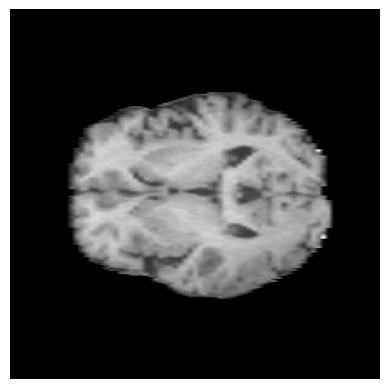

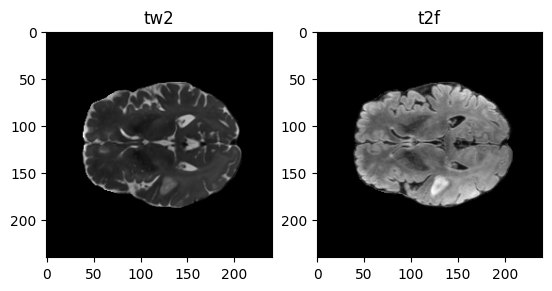

In [ ]:
# RandomAnisotropy

import random
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
!pip install torchio
import torchio as tio
from torchio.transforms import RandomFlip

def print_files(x):
    # Get a list of all the folders in the specified directory path
    folders = [folder for folder in os.listdir(x) if os.path.isdir(os.path.join(x, folder))]

    # Randomly select a folder from the list
    selected_folder = random.choice(folders)

    print(selected_folder)
    # Get the complete path of the selected folder
    selected_folder_path = os.path.join(x, selected_folder)

    # Get a list of all the files inside the selected folder
    files = os.listdir(selected_folder_path)
    print(files)
    #random_number = random.randint(0, 61)
    #use_file = random.choice(files)
    use_file = "BraTS-GLI-00642-000"
    selected_subfolder_path = os.path.join(x, selected_folder, use_file)
    print(selected_subfolder_path)
    #mod_files = os.listdir(selected_subfolder_path)
    #print(mod_files)

    dir_list = os.listdir(selected_subfolder_path)
    SSA_data = "/content/sample_data/GLI_data"
    if not os.path.exists(SSA_data):
      os.mkdir(SSA_data)
    # Print the files in the folder


    labels_SSA = []
    SSA_loop = []
    for item in dir_list:

        print(item)
        item_path = os.path.join(selected_subfolder_path, item)
        print(item_path)
        if os.path.isfile(item_path):
          # display the image
          # apply augmentation - RandomFlip
          GLI_image = tio.ScalarImage(item_path) #converts to 4D tensor
          #subject = tio.Subject(image=GLI_image)
          #transform = RandomFlip(axes=(0, 1, 2), p=0.3)
          #transformed_subject = transform(subject)
          #transformed_image = transformed_subject['image']


          transform = tio.RandomAnisotropy(axes=(0, 1, 2), downsampling=(1, 6))
          transformed_image = transform(GLI_image)

          #img = nib.load(item_path)

          transformed_new = np.squeeze(transformed_image)
          #data = np.array(img.dataobj)
          data = np.array(transformed_new)
          print("this is the data", data.shape)

          base_name = os.path.basename(item_path)
          base_name_without_extension = base_name[:-7]
          parts = base_name_without_extension.split("-")
          other = base_name_without_extension.split("-")
          mod_type = parts[-1]
          Patient = other[-3]
          print(Patient)

          #nifti_data = nifti_file.get_fdata()
          image = data[ :, :, 75]
          plt.imshow(image, cmap='gray')
          plt.axis('off')
          plt.savefig(os.path.join(SSA_data + "-" + Patient + "-" +  mod_type + '.png'))
          #plt.show()

          SSA_loop.append(image)
          #print("this is the SSA loop ", SSA_loop)
          #if mod_type == "t2w":

          labels_SSA.append(mod_type)
          print(labels_SSA)
          subplot_path = "/content/sample_data/RandomAnisotropy_GLI/"
          if not os.path.exists(subplot_path):
            os.mkdir(subplot_path)
          #label_mod = ["t2w", "t2f"]
          if len(labels_SSA) > 4:
            mod_t2w = labels_SSA.index("t2w")
            mod_t2f = labels_SSA.index("t2f")
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(SSA_loop[mod_t2w], cmap = "gray")
            ax[1].imshow(SSA_loop[mod_t2f], cmap = "gray")
            ax[0].set_title("tw2")
            ax[1].set_title("t2f")
            plt.savefig(os.path.join(subplot_path + "GLI" + "-" +  Patient +  '.png'), bbox_inches='tight')
            plt.show()




        #fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))

        #labels = ["(a)", "(b)", "(c)", "(d)", "(e)"]
        #for i, img in enumerate(SSA_loop):
         #ax[i].imshow(img, cmap='gray')
         #ax[i].axis('off')
         #ax[i].set_title(labels_SSA[i], y=-0.09)



print_files(GLI_dir)

ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData
['BraTS-GLI-00525-001', 'BraTS-GLI-01360-000', 'BraTS-GLI-01071-000', 'BraTS-GLI-01394-000', 'BraTS-GLI-01666-000', 'BraTS-GLI-00094-000', 'BraTS-GLI-00716-000', 'BraTS-GLI-01202-000', 'BraTS-GLI-00656-000', 'BraTS-GLI-00399-000', 'BraTS-GLI-00156-000', 'BraTS-GLI-00767-000', 'BraTS-GLI-00199-000', 'BraTS-GLI-00432-000', 'BraTS-GLI-00517-000', 'BraTS-GLI-01259-000', 'BraTS-GLI-01399-000', 'BraTS-GLI-00682-001', 'BraTS-GLI-00556-000', 'BraTS-GLI-00533-000', 'BraTS-GLI-00729-000', 'BraTS-GLI-01257-000', 'BraTS-GLI-01391-000', 'BraTS-GLI-01113-000', 'BraTS-GLI-01479-000', 'BraTS-GLI-01205-000', 'BraTS-GLI-00297-000', 'BraTS-GLI-00376-000', 'BraTS-GLI-01215-000', 'BraTS-GLI-00502-001', 'BraTS-GLI-01066-000', 'BraTS-GLI-00233-000', 'BraTS-GLI-00587-000', 'BraTS-GLI-00005-000', 'BraTS-GLI-01237-000', 'BraTS-GLI-01058-000', 'BraTS-GLI-00101-000', 'BraTS-GLI-00412-000', 'BraTS-GLI-00638-000', 'BraTS-GLI-00802-000', 'BraTS-GLI-00186-000', 'BraTS-

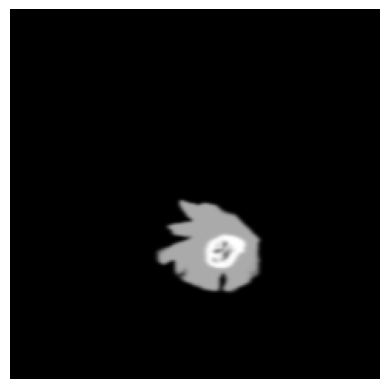

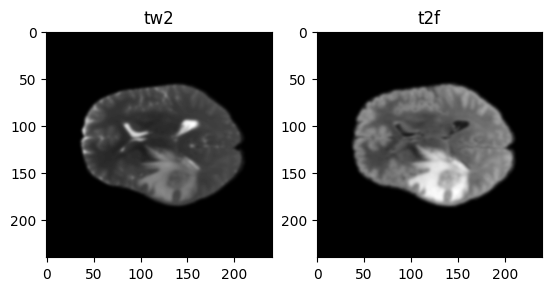

In [ ]:
# RandomBlur



import random
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
!pip install torchio
import torchio as tio
from torchio.transforms import RandomFlip

def print_files(x):
    # Get a list of all the folders in the specified directory path
    folders = [folder for folder in os.listdir(x) if os.path.isdir(os.path.join(x, folder))]

    # Randomly select a folder from the list
    selected_folder = random.choice(folders)

    print(selected_folder)
    # Get the complete path of the selected folder
    selected_folder_path = os.path.join(x, selected_folder)

    # Get a list of all the files inside the selected folder
    files = os.listdir(selected_folder_path)
    print(files)
    #random_number = random.randint(0, 61)
    #use_file = random.choice(files)
    use_file = "BraTS-GLI-00090-000"
    selected_subfolder_path = os.path.join(x, selected_folder, use_file)
    print(selected_subfolder_path)
    #mod_files = os.listdir(selected_subfolder_path)
    #print(mod_files)

    dir_list = os.listdir(selected_subfolder_path)
    SSA_data = "/content/sample_data/GLI_data"
    if not os.path.exists(SSA_data):
      os.mkdir(SSA_data)
    # Print the files in the folder


    labels_SSA = []
    SSA_loop = []
    for item in dir_list:

        print(item)
        item_path = os.path.join(selected_subfolder_path, item)
        print(item_path)
        if os.path.isfile(item_path):
          # display the image
          # apply augmentation - RandomFlip
          GLI_image = tio.ScalarImage(item_path) #converts to 4D tensor
          #subject = tio.Subject(image=GLI_image)
          #transform = RandomFlip(axes=(0, 1, 2), p=0.3)
          #transformed_subject = transform(subject)
          #transformed_image = transformed_subject['image']


          transform =  tio.RandomBlur(std=(0.5, 1.5))
          transformed_image = transform(GLI_image)

          #img = nib.load(item_path)

          transformed_new = np.squeeze(transformed_image)
          #data = np.array(img.dataobj)
          data = np.array(transformed_new)
          print("this is the data", data.shape)

          base_name = os.path.basename(item_path)
          base_name_without_extension = base_name[:-7]
          parts = base_name_without_extension.split("-")
          other = base_name_without_extension.split("-")
          mod_type = parts[-1]
          Patient = other[-3]
          print(Patient)

          #nifti_data = nifti_file.get_fdata()
          image = data[ :, :, 75]
          plt.imshow(image, cmap='gray')
          plt.axis('off')
          plt.savefig(os.path.join(SSA_data + "-" + Patient + "-" +  mod_type + '.png'))
          #plt.show()

          SSA_loop.append(image)
          #print("this is the SSA loop ", SSA_loop)
          #if mod_type == "t2w":

          labels_SSA.append(mod_type)
          print(labels_SSA)
          subplot_path = "/content/sample_data/RandomBlur_GLI/"
          if not os.path.exists(subplot_path):
            os.mkdir(subplot_path)
          #label_mod = ["t2w", "t2f"]
          if len(labels_SSA) > 4:
            mod_t2w = labels_SSA.index("t2w")
            mod_t2f = labels_SSA.index("t2f")
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(SSA_loop[mod_t2w], cmap = "gray")
            ax[1].imshow(SSA_loop[mod_t2f], cmap = "gray")
            ax[0].set_title("tw2")
            ax[1].set_title("t2f")
            plt.savefig(os.path.join(subplot_path + "GLI" + "-" +  Patient +  '.png'), bbox_inches='tight')
            plt.show()




        #fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))

        #labels = ["(a)", "(b)", "(c)", "(d)", "(e)"]
        #for i, img in enumerate(SSA_loop):
         #ax[i].imshow(img, cmap='gray')
         #ax[i].axis('off')
         #ax[i].set_title(labels_SSA[i], y=-0.09)



print_files(GLI_dir)


ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData
['BraTS-GLI-00525-001', 'BraTS-GLI-01360-000', 'BraTS-GLI-01071-000', 'BraTS-GLI-01394-000', 'BraTS-GLI-01666-000', 'BraTS-GLI-00094-000', 'BraTS-GLI-00716-000', 'BraTS-GLI-01202-000', 'BraTS-GLI-00656-000', 'BraTS-GLI-00399-000', 'BraTS-GLI-00156-000', 'BraTS-GLI-00767-000', 'BraTS-GLI-00199-000', 'BraTS-GLI-00432-000', 'BraTS-GLI-00517-000', 'BraTS-GLI-01259-000', 'BraTS-GLI-01399-000', 'BraTS-GLI-00682-001', 'BraTS-GLI-00556-000', 'BraTS-GLI-00533-000', 'BraTS-GLI-00729-000', 'BraTS-GLI-01257-000', 'BraTS-GLI-01391-000', 'BraTS-GLI-01113-000', 'BraTS-GLI-01479-000', 'BraTS-GLI-01205-000', 'BraTS-GLI-00297-000', 'BraTS-GLI-00376-000', 'BraTS-GLI-01215-000', 'BraTS-GLI-00502-001', 'BraTS-GLI-01066-000', 'BraTS-GLI-00233-000', 'BraTS-GLI-00587-000', 'BraTS-GLI-00005-000', 'BraTS-GLI-01237-000', 'BraTS-GLI-01058-000', 'BraTS-GLI-00101-000', 'BraTS-GLI-00412-000', 'BraTS-GLI-00638-000', 'BraTS-GLI-00802-000', 'BraTS-GLI-00186-000', 'BraTS-

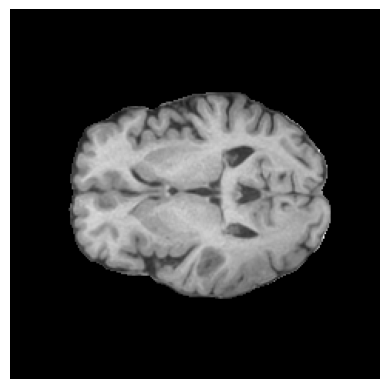

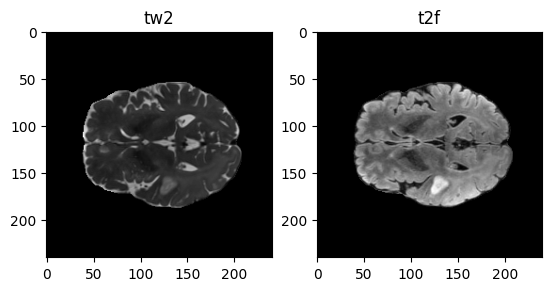

In [ ]:
# RandomNoise


import random
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
!pip install torchio
import torchio as tio
from torchio.transforms import RandomFlip

def print_files(x):
    # Get a list of all the folders in the specified directory path
    folders = [folder for folder in os.listdir(x) if os.path.isdir(os.path.join(x, folder))]

    # Randomly select a folder from the list
    selected_folder = random.choice(folders)

    print(selected_folder)
    # Get the complete path of the selected folder
    selected_folder_path = os.path.join(x, selected_folder)

    # Get a list of all the files inside the selected folder
    files = os.listdir(selected_folder_path)
    print(files)
    #random_number = random.randint(0, 61)
    #use_file = random.choice(files)
    use_file = "BraTS-GLI-00642-000"
    selected_subfolder_path = os.path.join(x, selected_folder, use_file)
    print(selected_subfolder_path)
    #mod_files = os.listdir(selected_subfolder_path)
    #print(mod_files)

    dir_list = os.listdir(selected_subfolder_path)
    SSA_data = "/content/sample_data/GLI_data"
    if not os.path.exists(SSA_data):
      os.mkdir(SSA_data)
    # Print the files in the folder


    labels_SSA = []
    SSA_loop = []
    for item in dir_list:

        print(item)
        item_path = os.path.join(selected_subfolder_path, item)
        print(item_path)
        if os.path.isfile(item_path):
          # display the image
          # apply augmentation - RandomFlip
          GLI_image = tio.ScalarImage(item_path) #converts to 4D tensor
          #subject = tio.Subject(image=GLI_image)
          #transform = RandomFlip(axes=(0, 1, 2), p=0.3)
          #transformed_subject = transform(subject)
          #transformed_image = transformed_subject['image']


          transform = tio.RandomNoise(mean=0, std=(0, 0.33))
          transformed_image = transform(GLI_image)

          #img = nib.load(item_path)

          transformed_new = np.squeeze(transformed_image)
          #data = np.array(img.dataobj)
          data = np.array(transformed_new)
          print("this is the data", data.shape)

          base_name = os.path.basename(item_path)
          base_name_without_extension = base_name[:-7]
          parts = base_name_without_extension.split("-")
          other = base_name_without_extension.split("-")
          mod_type = parts[-1]
          Patient = other[-3]
          print(Patient)

          #nifti_data = nifti_file.get_fdata()
          image = data[ :, :, 75]
          plt.imshow(image, cmap='gray')
          plt.axis('off')
          plt.savefig(os.path.join(SSA_data + "-" + Patient + "-" +  mod_type + '.png'))
          #plt.show()

          SSA_loop.append(image)
          #print("this is the SSA loop ", SSA_loop)
          #if mod_type == "t2w":

          labels_SSA.append(mod_type)
          print(labels_SSA)
          subplot_path = "/content/sample_data/RandomNoise_GLI/"
          if not os.path.exists(subplot_path):
            os.mkdir(subplot_path)
          #label_mod = ["t2w", "t2f"]
          if len(labels_SSA) > 4:
            mod_t2w = labels_SSA.index("t2w")
            mod_t2f = labels_SSA.index("t2f")
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(SSA_loop[mod_t2w], cmap = "gray")
            ax[1].imshow(SSA_loop[mod_t2f], cmap = "gray")
            ax[0].set_title("tw2")
            ax[1].set_title("t2f")
            plt.savefig(os.path.join(subplot_path + "GLI" + "-" +  Patient +  '.png'), bbox_inches='tight')
            plt.show()




        #fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))

        #labels = ["(a)", "(b)", "(c)", "(d)", "(e)"]
        #for i, img in enumerate(SSA_loop):
         #ax[i].imshow(img, cmap='gray')
         #ax[i].axis('off')
         #ax[i].set_title(labels_SSA[i], y=-0.09)



print_files(GLI_dir)

ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData
['BraTS-GLI-00525-001', 'BraTS-GLI-01360-000', 'BraTS-GLI-01071-000', 'BraTS-GLI-01394-000', 'BraTS-GLI-01666-000', 'BraTS-GLI-00094-000', 'BraTS-GLI-00716-000', 'BraTS-GLI-01202-000', 'BraTS-GLI-00656-000', 'BraTS-GLI-00399-000', 'BraTS-GLI-00156-000', 'BraTS-GLI-00767-000', 'BraTS-GLI-00199-000', 'BraTS-GLI-00432-000', 'BraTS-GLI-00517-000', 'BraTS-GLI-01259-000', 'BraTS-GLI-01399-000', 'BraTS-GLI-00682-001', 'BraTS-GLI-00556-000', 'BraTS-GLI-00533-000', 'BraTS-GLI-00729-000', 'BraTS-GLI-01257-000', 'BraTS-GLI-01391-000', 'BraTS-GLI-01113-000', 'BraTS-GLI-01479-000', 'BraTS-GLI-01205-000', 'BraTS-GLI-00297-000', 'BraTS-GLI-00376-000', 'BraTS-GLI-01215-000', 'BraTS-GLI-00502-001', 'BraTS-GLI-01066-000', 'BraTS-GLI-00233-000', 'BraTS-GLI-00587-000', 'BraTS-GLI-00005-000', 'BraTS-GLI-01237-000', 'BraTS-GLI-01058-000', 'BraTS-GLI-00101-000', 'BraTS-GLI-00412-000', 'BraTS-GLI-00638-000', 'BraTS-GLI-00802-000', 'BraTS-GLI-00186-000', 'BraTS-

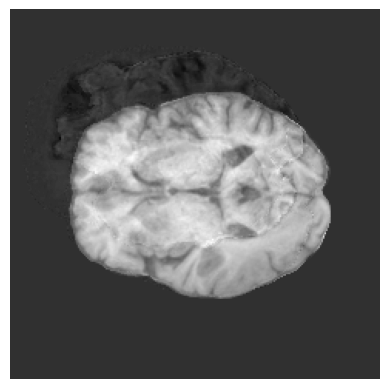

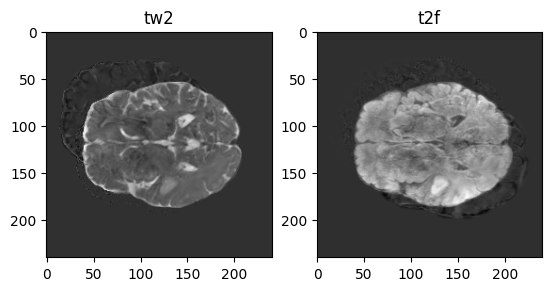

In [ ]:
# Random Motion


import random
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
!pip install torchio
import torchio as tio
from torchio.transforms import RandomFlip

def print_files(x):
    # Get a list of all the folders in the specified directory path
    folders = [folder for folder in os.listdir(x) if os.path.isdir(os.path.join(x, folder))]

    # Randomly select a folder from the list
    selected_folder = random.choice(folders)

    print(selected_folder)
    # Get the complete path of the selected folder
    selected_folder_path = os.path.join(x, selected_folder)

    # Get a list of all the files inside the selected folder
    files = os.listdir(selected_folder_path)
    print(files)
    #random_number = random.randint(0, 61)
    #use_file = random.choice(files)
    use_file = "BraTS-GLI-00642-000"
    selected_subfolder_path = os.path.join(x, selected_folder, use_file)
    print(selected_subfolder_path)
    #mod_files = os.listdir(selected_subfolder_path)
    #print(mod_files)

    dir_list = os.listdir(selected_subfolder_path)
    SSA_data = "/content/sample_data/GLI_data"
    if not os.path.exists(SSA_data):
      os.mkdir(SSA_data)
    # Print the files in the folder


    labels_SSA = []
    SSA_loop = []
    for item in dir_list:

        print(item)
        item_path = os.path.join(selected_subfolder_path, item)
        print(item_path)
        if os.path.isfile(item_path):
          # display the image
          # apply augmentation - RandomFlip
          GLI_image = tio.ScalarImage(item_path) #converts to 4D tensor
          #subject = tio.Subject(image=GLI_image)
          #transform = RandomFlip(axes=(0, 1, 2), p=0.3)
          #transformed_subject = transform(subject)
          #transformed_image = transformed_subject['image']


          transform = tio.RandomMotion(num_transforms=3, image_interpolation='nearest')
          transformed_image = transform(GLI_image)

          #img = nib.load(item_path)

          transformed_new = np.squeeze(transformed_image)
          #data = np.array(img.dataobj)
          data = np.array(transformed_new)
          print("this is the data", data.shape)

          base_name = os.path.basename(item_path)
          base_name_without_extension = base_name[:-7]
          parts = base_name_without_extension.split("-")
          other = base_name_without_extension.split("-")
          mod_type = parts[-1]
          Patient = other[-3]
          print(Patient)

          #nifti_data = nifti_file.get_fdata()
          image = data[ :, :, 75]
          plt.imshow(image, cmap='gray')
          plt.axis('off')
          plt.savefig(os.path.join(SSA_data + "-" + Patient + "-" +  mod_type + '.png'))
          #plt.show()

          SSA_loop.append(image)
          #print("this is the SSA loop ", SSA_loop)
          #if mod_type == "t2w":

          labels_SSA.append(mod_type)
          print(labels_SSA)
          subplot_path = "/content/sample_data/RandomMotion_GLI/"
          if not os.path.exists(subplot_path):
            os.mkdir(subplot_path)
          #label_mod = ["t2w", "t2f"]
          if len(labels_SSA) > 4:
            mod_t2w = labels_SSA.index("t2w")
            mod_t2f = labels_SSA.index("t2f")
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(SSA_loop[mod_t2w], cmap = "gray")
            ax[1].imshow(SSA_loop[mod_t2f], cmap = "gray")
            ax[0].set_title("tw2")
            ax[1].set_title("t2f")
            plt.savefig(os.path.join(subplot_path + "GLI" + "-" +  Patient +  '.png'), bbox_inches='tight')
            plt.show()




        #fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))

        #labels = ["(a)", "(b)", "(c)", "(d)", "(e)"]
        #for i, img in enumerate(SSA_loop):
         #ax[i].imshow(img, cmap='gray')
         #ax[i].axis('off')
         #ax[i].set_title(labels_SSA[i], y=-0.09)



print_files(GLI_dir)

ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData
['BraTS-GLI-00525-001', 'BraTS-GLI-01360-000', 'BraTS-GLI-01071-000', 'BraTS-GLI-01394-000', 'BraTS-GLI-01666-000', 'BraTS-GLI-00094-000', 'BraTS-GLI-00716-000', 'BraTS-GLI-01202-000', 'BraTS-GLI-00656-000', 'BraTS-GLI-00399-000', 'BraTS-GLI-00156-000', 'BraTS-GLI-00767-000', 'BraTS-GLI-00199-000', 'BraTS-GLI-00432-000', 'BraTS-GLI-00517-000', 'BraTS-GLI-01259-000', 'BraTS-GLI-01399-000', 'BraTS-GLI-00682-001', 'BraTS-GLI-00556-000', 'BraTS-GLI-00533-000', 'BraTS-GLI-00729-000', 'BraTS-GLI-01257-000', 'BraTS-GLI-01391-000', 'BraTS-GLI-01113-000', 'BraTS-GLI-01479-000', 'BraTS-GLI-01205-000', 'BraTS-GLI-00297-000', 'BraTS-GLI-00376-000', 'BraTS-GLI-01215-000', 'BraTS-GLI-00502-001', 'BraTS-GLI-01066-000', 'BraTS-GLI-00233-000', 'BraTS-GLI-00587-000', 'BraTS-GLI-00005-000', 'BraTS-GLI-01237-000', 'BraTS-GLI-01058-000', 'BraTS-GLI-00101-000', 'BraTS-GLI-00412-000', 'BraTS-GLI-00638-000', 'BraTS-GLI-00802-000', 'BraTS-GLI-00186-000', 'BraTS-

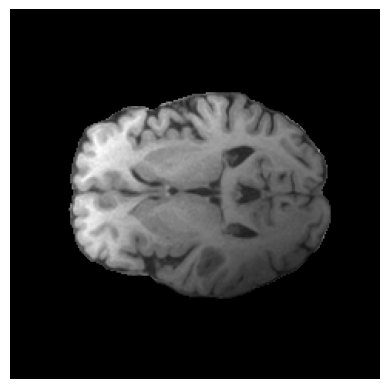

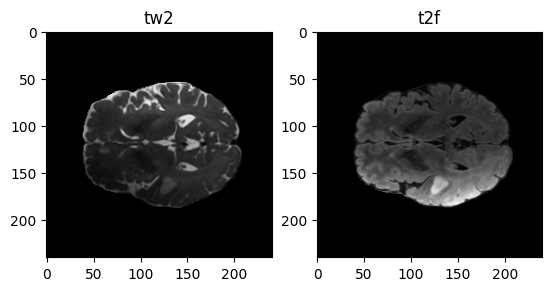

In [ ]:
# Random BiasField

import random
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
!pip install torchio
import torchio as tio
from torchio.transforms import RandomFlip

def print_files(x):
    # Get a list of all the folders in the specified directory path
    folders = [folder for folder in os.listdir(x) if os.path.isdir(os.path.join(x, folder))]

    # Randomly select a folder from the list
    selected_folder = random.choice(folders)

    print(selected_folder)
    # Get the complete path of the selected folder
    selected_folder_path = os.path.join(x, selected_folder)

    # Get a list of all the files inside the selected folder
    files = os.listdir(selected_folder_path)
    print(files)
    #random_number = random.randint(0, 61)
    #use_file = random.choice(files)
    use_file = "BraTS-GLI-00642-000"
    selected_subfolder_path = os.path.join(x, selected_folder, use_file)
    print(selected_subfolder_path)
    #mod_files = os.listdir(selected_subfolder_path)
    #print(mod_files)

    dir_list = os.listdir(selected_subfolder_path)
    SSA_data = "/content/sample_data/GLI_data"
    if not os.path.exists(SSA_data):
      os.mkdir(SSA_data)
    # Print the files in the folder


    labels_SSA = []
    SSA_loop = []
    for item in dir_list:

        print(item)
        item_path = os.path.join(selected_subfolder_path, item)
        print(item_path)
        if os.path.isfile(item_path):
          # display the image
          # apply augmentation - RandomFlip
          GLI_image = tio.ScalarImage(item_path) #converts to 4D tensor
          #subject = tio.Subject(image=GLI_image)
          #transform = RandomFlip(axes=(0, 1, 2), p=0.3)
          #transformed_subject = transform(subject)
          #transformed_image = transformed_subject['image']


          transform =  tio.RandomBiasField(coefficients=1)
          transformed_image = transform(GLI_image)

          #img = nib.load(item_path)

          transformed_new = np.squeeze(transformed_image)
          #data = np.array(img.dataobj)
          data = np.array(transformed_new)
          print("this is the data", data.shape)

          base_name = os.path.basename(item_path)
          base_name_without_extension = base_name[:-7]
          parts = base_name_without_extension.split("-")
          other = base_name_without_extension.split("-")
          mod_type = parts[-1]
          Patient = other[-3]
          print(Patient)

          #nifti_data = nifti_file.get_fdata()
          image = data[ :, :, 75]
          plt.imshow(image, cmap='gray')
          plt.axis('off')
          plt.savefig(os.path.join(SSA_data + "-" + Patient + "-" +  mod_type + '.png'))
          #plt.show()

          SSA_loop.append(image)
          #print("this is the SSA loop ", SSA_loop)
          #if mod_type == "t2w":

          labels_SSA.append(mod_type)
          print(labels_SSA)
          subplot_path = "/content/sample_data/RandomBiasField_GLI/"
          if not os.path.exists(subplot_path):
            os.mkdir(subplot_path)
          #label_mod = ["t2w", "t2f"]
          if len(labels_SSA) > 4:
            mod_t2w = labels_SSA.index("t2w")
            mod_t2f = labels_SSA.index("t2f")
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(SSA_loop[mod_t2w], cmap = "gray")
            ax[1].imshow(SSA_loop[mod_t2f], cmap = "gray")
            ax[0].set_title("tw2")
            ax[1].set_title("t2f")
            plt.savefig(os.path.join(subplot_path + "GLI" + "-" +  Patient +  '.png'), bbox_inches='tight')
            plt.show()




        #fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))

        #labels = ["(a)", "(b)", "(c)", "(d)", "(e)"]
        #for i, img in enumerate(SSA_loop):
         #ax[i].imshow(img, cmap='gray')
         #ax[i].axis('off')
         #ax[i].set_title(labels_SSA[i], y=-0.09)



print_files(GLI_dir)

ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData
['BraTS-GLI-00525-001', 'BraTS-GLI-01360-000', 'BraTS-GLI-01071-000', 'BraTS-GLI-01394-000', 'BraTS-GLI-01666-000', 'BraTS-GLI-00094-000', 'BraTS-GLI-00716-000', 'BraTS-GLI-01202-000', 'BraTS-GLI-00656-000', 'BraTS-GLI-00399-000', 'BraTS-GLI-00156-000', 'BraTS-GLI-00767-000', 'BraTS-GLI-00199-000', 'BraTS-GLI-00432-000', 'BraTS-GLI-00517-000', 'BraTS-GLI-01259-000', 'BraTS-GLI-01399-000', 'BraTS-GLI-00682-001', 'BraTS-GLI-00556-000', 'BraTS-GLI-00533-000', 'BraTS-GLI-00729-000', 'BraTS-GLI-01257-000', 'BraTS-GLI-01391-000', 'BraTS-GLI-01113-000', 'BraTS-GLI-01479-000', 'BraTS-GLI-01205-000', 'BraTS-GLI-00297-000', 'BraTS-GLI-00376-000', 'BraTS-GLI-01215-000', 'BraTS-GLI-00502-001', 'BraTS-GLI-01066-000', 'BraTS-GLI-00233-000', 'BraTS-GLI-00587-000', 'BraTS-GLI-00005-000', 'BraTS-GLI-01237-000', 'BraTS-GLI-01058-000', 'BraTS-GLI-00101-000', 'BraTS-GLI-00412-000', 'BraTS-GLI-00638-000', 'BraTS-GLI-00802-000', 'BraTS-GLI-00186-000', 'BraTS-

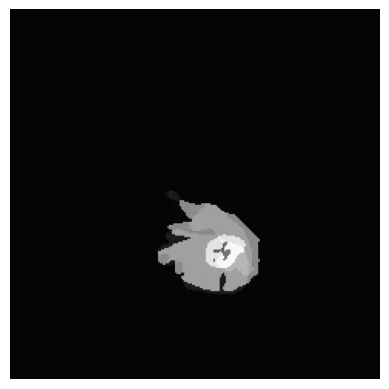

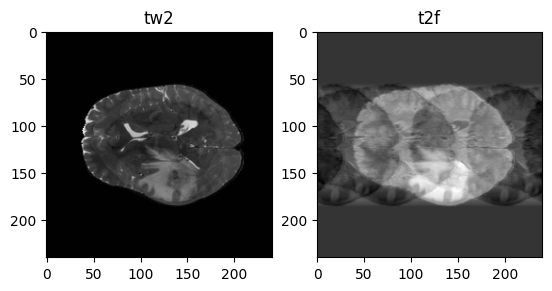

In [ ]:
# Random Ghosting


import random
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
!pip install torchio
import torchio as tio
from torchio.transforms import RandomFlip

def print_files(x):
    # Get a list of all the folders in the specified directory path
    folders = [folder for folder in os.listdir(x) if os.path.isdir(os.path.join(x, folder))]

    # Randomly select a folder from the list
    selected_folder = random.choice(folders)

    print(selected_folder)
    # Get the complete path of the selected folder
    selected_folder_path = os.path.join(x, selected_folder)

    # Get a list of all the files inside the selected folder
    files = os.listdir(selected_folder_path)
    print(files)
    #random_number = random.randint(0, 61)
    #use_file = random.choice(files)
    use_file = "BraTS-GLI-00090-000"
    selected_subfolder_path = os.path.join(x, selected_folder, use_file)
    print(selected_subfolder_path)
    #mod_files = os.listdir(selected_subfolder_path)
    #print(mod_files)

    dir_list = os.listdir(selected_subfolder_path)
    SSA_data = "/content/sample_data/GLI_data"
    if not os.path.exists(SSA_data):
      os.mkdir(SSA_data)
    # Print the files in the folder


    labels_SSA = []
    SSA_loop = []
    for item in dir_list:

        print(item)
        item_path = os.path.join(selected_subfolder_path, item)
        print(item_path)
        if os.path.isfile(item_path):
          # display the image
          # apply augmentation - RandomFlip
          GLI_image = tio.ScalarImage(item_path) #converts to 4D tensor
          #subject = tio.Subject(image=GLI_image)
          #transform = RandomFlip(axes=(0, 1, 2), p=0.3)
          #transformed_subject = transform(subject)
          #transformed_image = transformed_subject['image']


          transform = tio.RandomGhosting(intensity=1.5)
          transformed_image = transform(GLI_image)

          #img = nib.load(item_path)

          transformed_new = np.squeeze(transformed_image)
          #data = np.array(img.dataobj)
          data = np.array(transformed_new)
          print("this is the data", data.shape)

          base_name = os.path.basename(item_path)
          base_name_without_extension = base_name[:-7]
          parts = base_name_without_extension.split("-")
          other = base_name_without_extension.split("-")
          mod_type = parts[-1]
          Patient = other[-3]
          print(Patient)

          #nifti_data = nifti_file.get_fdata()
          image = data[ :, :, 75]
          plt.imshow(image, cmap='gray')
          plt.axis('off')
          plt.savefig(os.path.join(SSA_data + "-" + Patient + "-" +  mod_type + '.png'))
          #plt.show()

          SSA_loop.append(image)
          #print("this is the SSA loop ", SSA_loop)
          #if mod_type == "t2w":

          labels_SSA.append(mod_type)
          print(labels_SSA)
          subplot_path = "/content/sample_data/RandomGhosting_GLI/"
          if not os.path.exists(subplot_path):
            os.mkdir(subplot_path)
          #label_mod = ["t2w", "t2f"]
          if len(labels_SSA) > 4:
            mod_t2w = labels_SSA.index("t2w")
            mod_t2f = labels_SSA.index("t2f")
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(SSA_loop[mod_t2w], cmap = "gray")
            ax[1].imshow(SSA_loop[mod_t2f], cmap = "gray")
            ax[0].set_title("tw2")
            ax[1].set_title("t2f")
            plt.savefig(os.path.join(subplot_path + "GLI" + "-" +  Patient +  '.png'), bbox_inches='tight')
            plt.show()




        #fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))

        #labels = ["(a)", "(b)", "(c)", "(d)", "(e)"]
        #for i, img in enumerate(SSA_loop):
         #ax[i].imshow(img, cmap='gray')
         #ax[i].axis('off')
         #ax[i].set_title(labels_SSA[i], y=-0.09)



print_files(GLI_dir)

ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData
['BraTS-GLI-00525-001', 'BraTS-GLI-01360-000', 'BraTS-GLI-01071-000', 'BraTS-GLI-01394-000', 'BraTS-GLI-01666-000', 'BraTS-GLI-00094-000', 'BraTS-GLI-00716-000', 'BraTS-GLI-01202-000', 'BraTS-GLI-00656-000', 'BraTS-GLI-00399-000', 'BraTS-GLI-00156-000', 'BraTS-GLI-00767-000', 'BraTS-GLI-00199-000', 'BraTS-GLI-00432-000', 'BraTS-GLI-00517-000', 'BraTS-GLI-01259-000', 'BraTS-GLI-01399-000', 'BraTS-GLI-00682-001', 'BraTS-GLI-00556-000', 'BraTS-GLI-00533-000', 'BraTS-GLI-00729-000', 'BraTS-GLI-01257-000', 'BraTS-GLI-01391-000', 'BraTS-GLI-01113-000', 'BraTS-GLI-01479-000', 'BraTS-GLI-01205-000', 'BraTS-GLI-00297-000', 'BraTS-GLI-00376-000', 'BraTS-GLI-01215-000', 'BraTS-GLI-00502-001', 'BraTS-GLI-01066-000', 'BraTS-GLI-00233-000', 'BraTS-GLI-00587-000', 'BraTS-GLI-00005-000', 'BraTS-GLI-01237-000', 'BraTS-GLI-01058-000', 'BraTS-GLI-00101-000', 'BraTS-GLI-00412-000', 'BraTS-GLI-00638-000', 'BraTS-GLI-00802-000', 'BraTS-GLI-00186-000', 'BraTS-

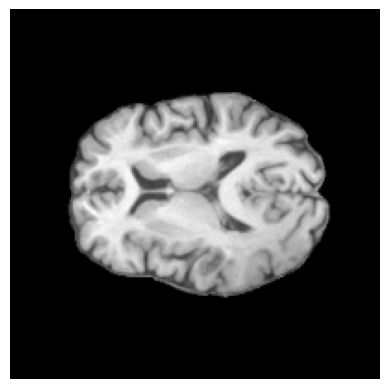

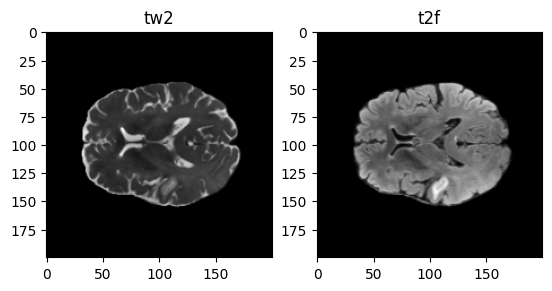

In [20]:
# Resample



import random
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
!pip install torchio
import torchio as tio
from torchio.transforms import RandomFlip

def print_files(x):
    # Get a list of all the folders in the specified directory path
    folders = [folder for folder in os.listdir(x) if os.path.isdir(os.path.join(x, folder))]

    # Randomly select a folder from the list
    selected_folder = random.choice(folders)

    print(selected_folder)
    # Get the complete path of the selected folder
    selected_folder_path = os.path.join(x, selected_folder)

    # Get a list of all the files inside the selected folder
    files = os.listdir(selected_folder_path)
    print(files)
    #random_number = random.randint(0, 61)
    #use_file = random.choice(files)
    use_file = "BraTS-GLI-00642-000"
    selected_subfolder_path = os.path.join(x, selected_folder, use_file)
    print(selected_subfolder_path)
    #mod_files = os.listdir(selected_subfolder_path)
    #print(mod_files)

    dir_list = os.listdir(selected_subfolder_path)
    SSA_data = "/content/sample_data/GLI_data"
    if not os.path.exists(SSA_data):
      os.mkdir(SSA_data)
    # Print the files in the folder


    labels_SSA = []
    SSA_loop = []
    for item in dir_list:

        print(item)
        item_path = os.path.join(selected_subfolder_path, item)
        print(item_path)
        if os.path.isfile(item_path):
          # display the image
          # apply augmentation - RandomFlip
          GLI_image = tio.ScalarImage(item_path) #converts to 4D tensor
          #subject = tio.Subject(image=GLI_image)
          #transform = RandomFlip(axes=(0, 1, 2), p=0.3)
          #transformed_subject = transform(subject)
          #transformed_image = transformed_subject['image']


          transform =  tio.Resample((1.2, 1.2, 6))
          transformed_image = transform(GLI_image)

          #img = nib.load(item_path)

          transformed_new = np.squeeze(transformed_image)
          #data = np.array(img.dataobj)
          data = np.array(transformed_new)
          print("this is the data", data.shape)

          base_name = os.path.basename(item_path)
          base_name_without_extension = base_name[:-7]
          parts = base_name_without_extension.split("-")
          other = base_name_without_extension.split("-")
          mod_type = parts[-1]
          Patient = other[-3]
          print(Patient)

          #nifti_data = nifti_file.get_fdata()
          image = data[ :, :, 13] # changed from 75
          plt.imshow(image, cmap='gray')
          plt.axis('off')
          plt.savefig(os.path.join(SSA_data + "-" + Patient + "-" +  mod_type + '.png'))
          #plt.show()

          SSA_loop.append(image)
          #print("this is the SSA loop ", SSA_loop)
          #if mod_type == "t2w":

          labels_SSA.append(mod_type)
          print(labels_SSA)
          subplot_path = "/content/sample_data/Resample_GLI/"
          if not os.path.exists(subplot_path):
            os.mkdir(subplot_path)
          #label_mod = ["t2w", "t2f"]
          if len(labels_SSA) > 4:
            mod_t2w = labels_SSA.index("t2w")
            mod_t2f = labels_SSA.index("t2f")
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(SSA_loop[mod_t2w], cmap = "gray")
            ax[1].imshow(SSA_loop[mod_t2f], cmap = "gray")
            ax[0].set_title("tw2")
            ax[1].set_title("t2f")
            plt.savefig(os.path.join(subplot_path + "GLI" + "-" +  Patient +  '.png'), bbox_inches='tight')
            plt.show()




        #fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))

        #labels = ["(a)", "(b)", "(c)", "(d)", "(e)"]
        #for i, img in enumerate(SSA_loop):
         #ax[i].imshow(img, cmap='gray')
         #ax[i].axis('off')
         #ax[i].set_title(labels_SSA[i], y=-0.09)



print_files(GLI_dir)

ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData
['BraTS-GLI-00525-001', 'BraTS-GLI-01360-000', 'BraTS-GLI-01071-000', 'BraTS-GLI-01394-000', 'BraTS-GLI-01666-000', 'BraTS-GLI-00094-000', 'BraTS-GLI-00716-000', 'BraTS-GLI-01202-000', 'BraTS-GLI-00656-000', 'BraTS-GLI-00399-000', 'BraTS-GLI-00156-000', 'BraTS-GLI-00767-000', 'BraTS-GLI-00199-000', 'BraTS-GLI-00432-000', 'BraTS-GLI-00517-000', 'BraTS-GLI-01259-000', 'BraTS-GLI-01399-000', 'BraTS-GLI-00682-001', 'BraTS-GLI-00556-000', 'BraTS-GLI-00533-000', 'BraTS-GLI-00729-000', 'BraTS-GLI-01257-000', 'BraTS-GLI-01391-000', 'BraTS-GLI-01113-000', 'BraTS-GLI-01479-000', 'BraTS-GLI-01205-000', 'BraTS-GLI-00297-000', 'BraTS-GLI-00376-000', 'BraTS-GLI-01215-000', 'BraTS-GLI-00502-001', 'BraTS-GLI-01066-000', 'BraTS-GLI-00233-000', 'BraTS-GLI-00587-000', 'BraTS-GLI-00005-000', 'BraTS-GLI-01237-000', 'BraTS-GLI-01058-000', 'BraTS-GLI-00101-000', 'BraTS-GLI-00412-000', 'BraTS-GLI-00638-000', 'BraTS-GLI-00802-000', 'BraTS-GLI-00186-000', 'BraTS-

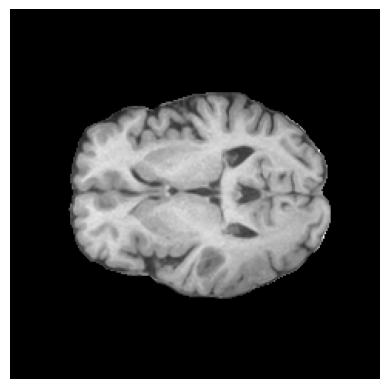

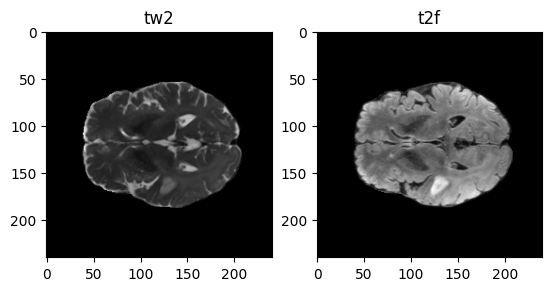

In [25]:
# combination of augmentations

import random
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
!pip install torchio
import torchio as tio
from torchio.transforms import RandomFlip

def print_files(x):
    # Get a list of all the folders in the specified directory path
    folders = [folder for folder in os.listdir(x) if os.path.isdir(os.path.join(x, folder))]

    # Randomly select a folder from the list
    selected_folder = random.choice(folders)

    print(selected_folder)
    # Get the complete path of the selected folder
    selected_folder_path = os.path.join(x, selected_folder)

    # Get a list of all the files inside the selected folder
    files = os.listdir(selected_folder_path)
    print(files)
    #random_number = random.randint(0, 61)
    #use_file = random.choice(files)
    use_file = "BraTS-GLI-00642-000"
    selected_subfolder_path = os.path.join(x, selected_folder, use_file)
    print(selected_subfolder_path)
    #mod_files = os.listdir(selected_subfolder_path)
    #print(mod_files)

    dir_list = os.listdir(selected_subfolder_path)
    SSA_data = "/content/sample_data/GLI_data"
    if not os.path.exists(SSA_data):
      os.mkdir(SSA_data)
    # Print the files in the folder


    labels_SSA = []
    SSA_loop = []
    for item in dir_list:

        print(item)
        item_path = os.path.join(selected_subfolder_path, item)
        print(item_path)
        if os.path.isfile(item_path):
          # display the image
          # apply augmentation - RandomFlip
          GLI_image = tio.ScalarImage(item_path) #converts to 4D tensor
          #subject = tio.Subject(image=GLI_image)
          #transform = RandomFlip(axes=(0, 1, 2), p=0.3)
          #transformed_subject = transform(subject)
          #transformed_image = transformed_subject['image']


          transform_1 =  tio.RandomAnisotropy(axes=(0, 1, 2), downsampling=(1, 6))
          transformed_image_1 = transform_1(GLI_image)
          transform_2 =  tio.RandomNoise(mean=0, std=(0, 0.33))
          transformed_image_2 =  transform_2(transformed_image_1)

          #img = nib.load(item_path)

          transformed_new = np.squeeze(transformed_image_2)
          #data = np.array(img.dataobj)
          data = np.array(transformed_new)
          print("this is the data", data.shape)

          base_name = os.path.basename(item_path)
          base_name_without_extension = base_name[:-7]
          parts = base_name_without_extension.split("-")
          other = base_name_without_extension.split("-")
          mod_type = parts[-1]
          Patient = other[-3]
          print(Patient)

          #nifti_data = nifti_file.get_fdata()
          image = data[ :, :, 75]
          plt.imshow(image, cmap='gray')
          plt.axis('off')
          plt.savefig(os.path.join(SSA_data + "-" + Patient + "-" +  mod_type + '.png'))
          #plt.show()

          SSA_loop.append(image)
          #print("this is the SSA loop ", SSA_loop)
          #if mod_type == "t2w":

          labels_SSA.append(mod_type)
          print(labels_SSA)
          subplot_path = "/content/sample_data/Anisotropy_Noise_GLI/"
          if not os.path.exists(subplot_path):
            os.mkdir(subplot_path)
          #label_mod = ["t2w", "t2f"]
          if len(labels_SSA) > 4:
            mod_t2w = labels_SSA.index("t2w")
            mod_t2f = labels_SSA.index("t2f")
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(SSA_loop[mod_t2w], cmap = "gray")
            ax[1].imshow(SSA_loop[mod_t2f], cmap = "gray")
            ax[0].set_title("tw2")
            ax[1].set_title("t2f")
            plt.savefig(os.path.join(subplot_path + "GLI" + "-" +  Patient +  '.png'), bbox_inches='tight')
            plt.show()




        #fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))

        #labels = ["(a)", "(b)", "(c)", "(d)", "(e)"]
        #for i, img in enumerate(SSA_loop):
         #ax[i].imshow(img, cmap='gray')
         #ax[i].axis('off')
         #ax[i].set_title(labels_SSA[i], y=-0.09)

print_files(GLI_dir)


ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2
['BraTS-SSA-00161-000', 'BraTS-SSA-00133-000', 'BraTS-SSA-00080-000', 'BraTS-SSA-00220-000', 'BraTS-SSA-00015-000', 'BraTS-SSA-00010-000', 'BraTS-SSA-00144-000', 'BraTS-SSA-00127-000', 'BraTS-SSA-00116-000', 'BraTS-SSA-00026-000', 'BraTS-SSA-00074-000', 'BraTS-SSA-00049-000', 'BraTS-SSA-00056-000', 'BraTS-SSA-00223-000', 'BraTS-SSA-00122-000', 'BraTS-SSA-00093-000', 'BraTS-SSA-00152-000', 'BraTS-SSA-00055-000', 'BraTS-SSA-00131-000', 'BraTS-SSA-00078-000', 'BraTS-SSA-00025-000', 'BraTS-SSA-00068-000', 'BraTS-SSA-00110-000', 'BraTS-SSA-00008-000', 'BraTS-SSA-00051-000', 'BraTS-SSA-00037-000', 'BraTS-SSA-00011-000', 'BraTS-SSA-00113-000', 'BraTS-SSA-00146-000', 'BraTS-SSA-00050-000', 'BraTS-SSA-00121-000', 'BraTS-SSA-00057-000', 'BraTS-SSA-00046-000', 'BraTS-SSA-00096-000', 'BraTS-SSA-00012-000', 'BraTS-SSA-00076-000', 'BraTS-SSA-00135-000', 'BraTS-SSA-00120-000', 'BraTS-SSA-00097-000', 'BraTS-SSA-00202-000', 'BraTS-SSA-00150-000', 'Bra

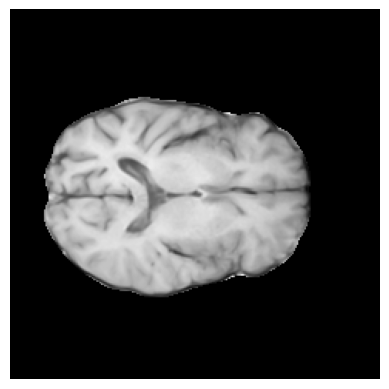

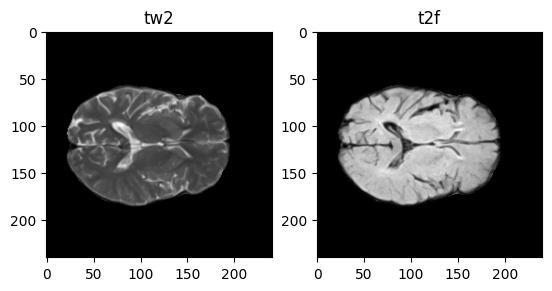

In [38]:



## SSA data



import random
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
!pip install torchio
import torchio as tio
from torchio.transforms import RandomFlip

def print_files(x):
    # Get a list of all the folders in the specified directory path
    folders = [folder for folder in os.listdir(x) if os.path.isdir(os.path.join(x, folder))]

    # Randomly select a folder from the list
    selected_folder = random.choice(folders)

    print(selected_folder)
    # Get the complete path of the selected folder
    selected_folder_path = os.path.join(x, selected_folder)

    # Get a list of all the files inside the selected folder
    files = os.listdir(selected_folder_path)
    print(files)
    #random_number = random.randint(0, 61)
    use_file = random.choice(files)

    selected_subfolder_path = os.path.join(x, selected_folder, use_file)
    print(selected_subfolder_path)
    #mod_files = os.listdir(selected_subfolder_path)
    #print(mod_files)

    dir_list = os.listdir(selected_subfolder_path)
    SSA_data = "/content/sample_data/GLI_data"
    if not os.path.exists(SSA_data):
      os.mkdir(SSA_data)
    # Print the files in the folder


    labels_SSA = []
    SSA_loop = []
    for item in dir_list:

        print(item)
        item_path = os.path.join(selected_subfolder_path, item)
        print(item_path)
        if os.path.isfile(item_path):
          # display the image
          # apply augmentation - RandomFlip





          img = nib.load(item_path)


          data = np.array(img.dataobj)



          base_name = os.path.basename(item_path)
          base_name_without_extension = base_name[:-7]
          parts = base_name_without_extension.split("-")
          other = base_name_without_extension.split("-")
          mod_type = parts[-1]
          Patient = other[-3]
          print(Patient)

          #nifti_data = nifti_file.get_fdata()
          image = data[ :, :, 75]
          plt.imshow(image, cmap='gray')
          plt.axis('off')
          plt.savefig(os.path.join(SSA_data + "-" + Patient + "-" +  mod_type + '.png'))
          #plt.show()

          SSA_loop.append(image)
          #print("this is the SSA loop ", SSA_loop)
          #if mod_type == "t2w":

          labels_SSA.append(mod_type)
          print(labels_SSA)
          subplot_path = "/content/sample_data/SSA_images/"
          if not os.path.exists(subplot_path):
            os.mkdir(subplot_path)
          #label_mod = ["t2w", "t2f"]
          if len(labels_SSA) > 4:
            mod_t2w = labels_SSA.index("t2w")
            mod_t2f = labels_SSA.index("t2f")
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(SSA_loop[mod_t2w], cmap = "gray")
            ax[1].imshow(SSA_loop[mod_t2f], cmap = "gray")
            ax[0].set_title("tw2")
            ax[1].set_title("t2f")
            plt.savefig(os.path.join(subplot_path + "SSA" + "-" +  Patient +  '.png'), bbox_inches='tight')
            plt.show()




        #fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))

        #labels = ["(a)", "(b)", "(c)", "(d)", "(e)"]
        #for i, img in enumerate(SSA_loop):
         #ax[i].imshow(img, cmap='gray')
         #ax[i].axis('off')
         #ax[i].set_title(labels_SSA[i], y=-0.09)

print_files(SSA_dir)